# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.
2. En déduire l'espérance et la variance de $Y_n$.
3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.
4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left((Y_n-Y_{n+h})^2\right) = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.
5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$


### Question 1
On a clairement : $\mathbb{E}(X_i) = 0$ et $\mathbb{E}(X_i^2) = 1$
d'où $V(X_i) = \mathbb{E}(X_i^2) - \mathbb{E}(X_i)^2 = 1$ 

### Question 2
Par linéarité de l'espérance :  $\mathbb{E}(Y_n) = 0$. Comme les variables $X_i$ sont indépendantes : $V(Y_n) = \sum\limits_{i=1}^n V(X_i) = n$

### Question 3

### Question 4
1) $\mathrm{Cov}(Y_n,Y_{n'}) = \mathbb{E}(Y_nY_{n'}) - \mathbb{E}(Y_n)\mathbb{E}(Y_{n'}) = \mathbb{E}(Y_nY_{n'}) $ 

Or:
$$
Y_nY_{n'} = \sum\limits_{j=1}^{n'} \sum\limits_{i=1}^n X_j X_i
$$
On suppose sans perte de généralité $n' \geq n$ et alors :
$$
Y_nY_{n'} = \sum\limits_{j=1}^{n} \sum\limits_{i=1}^n X_j X_i + \sum\limits_{j=n+1}^{n'} \sum\limits_{i=1}^n X_j X_i
$$
Avant d'en prendre l'espérance, notons que $\mathbb{E}(X_iX_j) = \delta_{i,j}$. Notons également que dans la deuxième somme, on a toujours $j \ne i$ donc l'espérance de cette somme est nulle. On a finalement:
$$
\mathbb{E}(Y_nY_{n'}) = \sum\limits_{j=1}^{n} \sum\limits_{i=1}^n \mathbb{E}(X_iX_j) = \sum\limits_{j=1}^{n} \sum\limits_{i=1}^n \delta_{i,j} = n
$$

On a donc : $\mathrm{Cov}(Y_n,Y_{n'}) = n = min(n,n')$


Les rôles sont symétriques donc finalement $\mathrm{Cov}(Y_n,Y_{n'}) = min(n,n')$

2) $ \mathbb{E}((Y_n - Y_{n+h})^2) = \mathbb{E}(Y_n^2) - 2\mathbb{E}(Y_nY_{n+h}) + \mathbb{E}(Y_{n+h}^2)$

D'après ce qui précède : $\mathbb{E}(Y_nY_{n+h}) = \mathrm{Cov}(Y_n,Y_{n+h})$ = n

Ensuite:
$$
\mathbb{E}(Y_n^2) = V(Y_n) + \mathbb{E}(Y_n)^2 = n
$$

Donc:
$$
\mathbb{E}((Y_n - Y_{n+h})^2) = n - 2n + n+h = h
$$

Ainsi:
$$
\frac{1}{2}\mathbb{E}((Y_n - Y_{n+h})^2) = \frac{h}{2}
$$

### Question 5
les variables $X_i$ sont indépendantes et identiquement distribuées. En notant $Z_n = \dfrac{Y_n - n\mu}{\sigma \sqrt{n}} = \dfrac{Y_n}{\sqrt{n}} $

Alors d'après le thérème centrale limite : 
$$
Z_n = \frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)
$$


In [1]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Initialisation de la graine
np.random.seed(1234)

# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.



### Question 1
1) $(t_i, t_{i+1}] \ne \varnothing$

2) $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}] = (0,1]$

3) les intervalles sont disjoints (car la borne inférieure est ouverte)

Donc $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

### Question 2
On remarque que $nt_i = i = [nt]$ d'après l'énoncé. On a donc :  
$$
Z^{(n)}_{t_i}= \frac{Y_{[nt_i]}}{\sqrt{n}} = \frac{Y_{[nt]}}{\sqrt{n}} = Z^{(n)}_{t}
$$


In [3]:
### Question 3:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

def marche(n):
    
    T = [i/n for i in range(n+1)]
    M = [0]
    Y = 0
    for i in range(1,n+1):
        X = 2*rd.randint(0,2) - 1  # prend la valeur 1 où -1 équiprobablement
        Y = Y + X
        M.append(Y/np.sqrt(i))
    
    plt.plot(T,M)
    plt.title(f"Marche aléatoire pour n = {n}")
    plt.show()

    

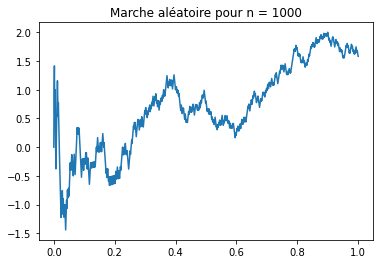

In [4]:
marche(1000)

4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



In [5]:
### Question 4
def echantillon(N,n):
    e = []
    Y = 0
    for j in range(N):
        Y = 0
        for i in range(1,n+1):
            X = 2*rd.randint(0,2) - 1  # prend la valeur 1 où -1 équiprobablement
            Y = Y + X
        Z = Y/np.sqrt(n)
        e.append(Z)
        
    x = np.linspace(-3, 3, 100)
    y = n*sps.norm.pdf(x,0,1)  # on passe de la probabilité à une estimation du 
    plt.plot(x,y)              #
    plt.hist(e, 7, [-3,3])
    plt.title(f"Histogramme de la distribution des {N} valeurs de $Z_1^{({n})}$")
    plt.show()
    
    
        

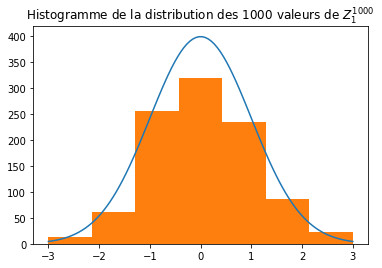

In [6]:
echantillon(1000,1000)


### Commentaire
L'histogramme semble plutôt bien suivre la distribution gaussienne.

**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

1. Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

In [113]:
T = np.linspace(0,1,1000)

def marche_2(n):
    M = [0 for i in range(1000)]
    Y = 0
    c = 0
    t = rd.random()   #on prend un t au hasard dans [0,1]
    for i in range(1,n+1):
       
        U = rd.random()
        if t > U:
            c = -1
        else:
            c = 1
        X = 2*rd.randint(0,2) - 1  # prend la valeur 1 où -1 équiprobablement
        Y = Y + X*c
        M[i-1] = Y/np.sqrt(i)
    
    plt.plot(T,M)
    plt.title(f"Marche aléatoire pour n = {n}")
    plt.show()

    

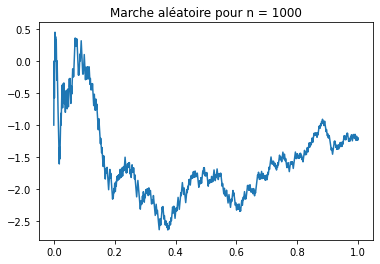

In [120]:
marche_2(1000)

## Commentaire :
Nous ne comprenons pas l'intérêt de discrétiser l'intervalle [0,1] puisque ne n'affichons la trajectoire que pour un seule t. Si l'on voulait afficher l'ensemble des trajectoires, il faudrait faire un plot 3D mais le rendu serait illisible...

2. Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

### Question 2
Notons $W_i^t = X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$. 

On a directement que $W_i^t(\Omega) = \{-1, 1\}$ et que  $\mathbb{P}(W_i^t = 1) = \mathbb{P}(W_i^t = -1) = \dfrac{1}{2}$

On a donc :
$$
\mathbb{E}(W_i^t) = 0, \quad V(W_i^t) = 1^2 \times \dfrac{1}{2} + (-1)^2 \times \dfrac{1}{2} = 1
$$

Commes les $W_i^t$ sont indépendantes par indépendance des $X_i$ et des $U_i$, l'espérance de $\tilde{Z}^{(n)}_t$ est la somme des espérances des $W_i^t$, donc:
$$\mathbb{E}(\tilde{Z}^{(n)}_t) = 0$$

De même:
$$
V(\tilde{Z}^{(n)}_t) = V\left(\frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))\right) = \frac{1}{n}\sum_{i=1}^n V(W_i^t) = 1
$$

3. Montrer que $\frac12\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) =  a h$ pour $h>0$ et tel que $t+h \leq 1$, pour une constante $a$ à déterminer.

4. Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

### Question 3
$\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) = \mathbb{E}((\tilde{Z}^{(n)}_t)^2) -2\mathbb{E}(\tilde{Z}^{(n)}_t\tilde{Z}^{(n)}_{t+h}) + \mathbb{E}((\tilde{Z}^{(n)}_{t+h})^2) $

Dans un premier temps :
$$
\mathbb{E}((\tilde{Z}^{(n)}_t)^2) = V(\tilde{Z}^{(n)}_t) + \mathbb{E}(\tilde{Z}^{(n)}_t)^2 = 1
$$

Calculons ensuite $\mathbb{E}(\tilde{Z}^{(n)}_t\tilde{Z}^{(n)}_{t+h})$ :
$$
\mathbb{E}(\tilde{Z}^{(n)}_t\tilde{Z}^{(n)}_{t+h}) = \frac{1}{n}\sum_{i=1}^n\sum_{j=1}^n \mathbb{E}(W_i^t W_j^{t+h})
$$

En remarquant que $W_i^t$ et $W_j^{t+h}$ sont indépendants pour $j \ne i$, on alors :
$$
\mathbb{E}(W_i^t W_j^{t+h}) = \mathbb{E}(W_i^t)\mathbb{E}(W_j^{t+h}) = 0
$$

Il ne reste alors dans la double somme que les termes suivants :
$$
\mathbb{E}(\tilde{Z}^{(n)}_t\tilde{Z}^{(n)}_{t+h}) = \frac{1}{n}\sum_{i=1}^n \mathbb{E}(W_i^t W_i^{t+h})
$$

Posons $T_i^h = W_i^t W_i^{t+h} = X_i^2(1_{[0,U_i]}(t)-1_{]U_i,1]}(t))(1_{[0,U_i]}(t+h)-1_{]U_i,1]}(t+h))$

On a $T_i^h(\Omega) = \{-1, 1\}$. De plus :

\begin{aligned}
\mathbb{P}(T_i^h = 1) &= \mathbb{P}((U_i \geq t) \cap (U_i \geq t+h)) + \mathbb{P}((U_i \leq t) \cap (U_i \leq t+h))
\\ &= \mathbb{P}(U_i \geq t+h) + \mathbb{P}(U_i \leq t)
\\ &= 1 - (t+h) + t
\\ &= 1-h
\end{aligned}

On en déduit alors :
\begin{aligned}
\mathbb{E}(T_i^h) &= 1 \times (1-h) + (-1)\times h 
\\ &= 1-2h
\end{aligned}

Ainsi : 
$$
\begin{aligned}
\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) &= 1  -2\frac{1}{n}\sum_{i=1}^n \mathbb{E}(T_i^h) + 1
\\ &= 2 - \frac{2}{n}\sum_{i=1}^n (1 - 2h)
\\ &= 2 - (2 - 4h)
\\ &= 4h
\end{aligned}
$$

On conclut donc :
$$
\boxed{\frac{1}{2}\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) = 2h}
$$



### Question 4 :


5. Décrire les différences et les similarités entre les deux approches.

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

On peut ainsi écrire la version 2D de $\tilde{Z}$ de la manière suivante :
$$\tilde{Z}^{(n)}_{(x,y)} = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{\{x \cos(\alpha) + y \sin(\alpha) \leq p\}}-1_{\{x \cos(\alpha) + y \sin(\alpha) > p\}})$$

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

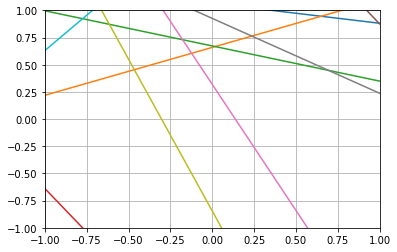

In [12]:
###Question 1:

def droite_alea():
    alpha = np.random.uniform(0, np.pi)
    p = np.random.uniform(-np.sqrt(2), np.sqrt(2))
    X = np.linspace(-1,1, 100)
    if np.sin(alpha) == 0:
        Y = [p/np.cos(alpha) for i in range(100)]
    else:
        Y = [(p - x*np.cos(alpha))/np.sin(alpha) for x in X]
    
    return [alpha, p, X, Y]
    
    
for i in range(10):
    X, Y = droite_alea()[2], droite_alea()[3]
    plt.plot(X,Y)
    plt.axis([-1., 1., -1., 1.])
plt.grid()
plt.show()



2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

In [135]:
#Question 2:
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)

def grille_alea():
    x = np.linspace(-1, 1, 200)
    y = np.linspace(-1, 1, 200)
    X, Y = np.meshgrid(x, y)  # je ne comprends pas comment utiliser cet outil....
    D = droite_alea()
    alpha, p = D[0], D[1]

    M = np.zeros((200,200))
    for i in range(200):
        for j in range(200): 
            xi = (i-100)/100    #on se ramène à l'intervalle [-1, 1]
            yj = (j-100)/100
            if xi*np.cos(alpha) + yj*np.sin(alpha) <= p:
                M[i,j] = 1
                
            else:
                M[i,j] = -1
    return M

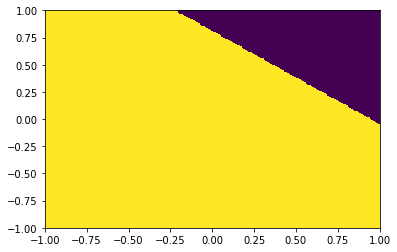

In [136]:
plt.pcolormesh(x, y,grille_alea()[:-1, :-1])

3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

In [133]:
def marche_3(n):
    M = grille_alea()
    M2 = np.zeros((200,200))
    for i in range(200):
        for j in range(200):
            C = M[i,j] #vaut -1 ou 1
            Y = 0
            for k in range(1, n+1):
                X = 2*rd.randint(0,2) - 1
                Y += X
            M2[i,j] = C*Y/np.sqrt(n)
    
    return M2

In [137]:
np.shape(marche_3(10))

KeyboardInterrupt: 

[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


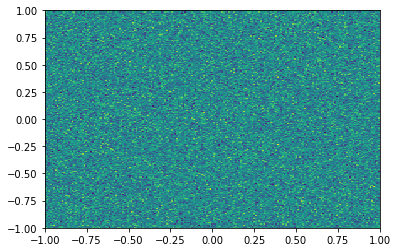

In [132]:
plt.pcolormesh(x, y, marche_3(100)[:-1, :-1])


4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

6. Une généralisation à deux dimensions d'une discrétisation du mouvement brownien standard peut être définie de la manière suivante : notant $(x_i,y_i)$ les coordonnées des points de la grille de discrétisation du domaine $[0,1]^2$, le vecteur formé des $Z_{(x_i,y_i)}$ est gaussien, centré et de covariance $\text{Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$. Proposer et implémenter un algorithme de simulation de ce modèle sur une grille régulière de discrétisation du domaine $[0,1]^2$. Quelles difficultés rencontrez-vous ?